In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot

In [2]:
# Importing the datasets
df_original = pd.read_csv("../waters_datasets/Datasets_With_Predictions/SVM-dataset2.csv", encoding= 'unicode_escape')

df_new = pd.read_csv("./list_of_stations.csv", encoding = 'unicode_escape')

In [3]:
df_new.dtypes

Water Quality\nStation Code               float64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                   object
Longitude                                 float64
Unnamed: 7                                float64
dtype: object

In [4]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude,Unnamed: 7
0,14.0,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613,NaN
1,25.0,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839,NaN
2,26.0,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519,NaN
3,30.0,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627,NaN
4,1174.0,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.8483,78.034942,NaN


In [5]:
#Drop random column
df_new.drop("Unnamed: 7", inplace = True, axis = 1)

In [6]:
df_new.shape

(4205, 7)

<AxesSubplot:>

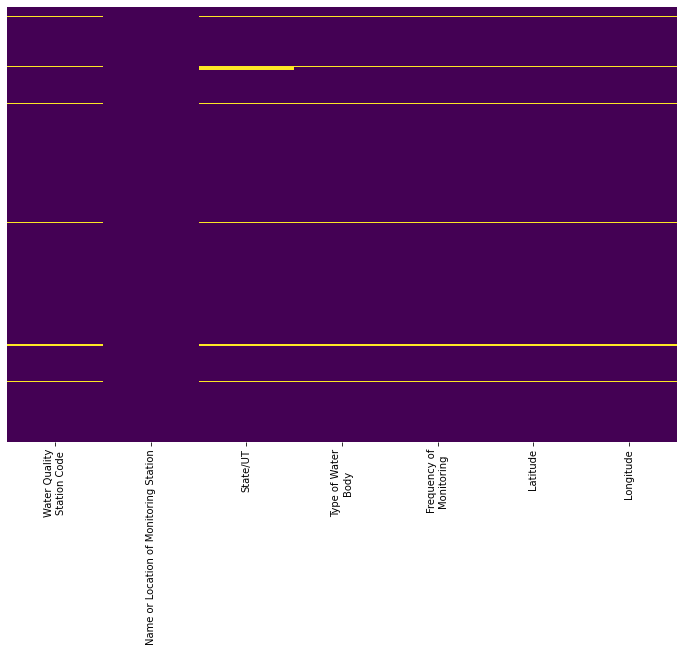

In [7]:
# checking for missing values in the dataset
plt.figure(figsize=(12,8))
sns.heatmap(df_new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
#drop all rows with missing values
df_new.dropna(axis = 0, inplace = True)

In [9]:
#Change types of latitude and station code to float and int
df_new["Latitude"] = pd.to_numeric(df_new["Latitude"], errors='coerce')
df_new["Water Quality\nStation Code"] = df_new["Water Quality\nStation Code"].astype(int)

In [10]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude
0,14,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613
1,25,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839
2,26,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519
3,30,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627
4,1174,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.848300,78.034942


In [11]:
df_original.shape

(1148, 15)

In [12]:
df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf,WQI_clf_pred
0,0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,6.2,8.6,7.7,110.0,0.3,0.7,10.0,641.0,44.135571,1,1
1,1,1002,BEAS AT D/S KULU,HIMACHAL PRADESH,11.1,9.2,7.4,107.0,1.0,0.7,495.0,1200.0,53.078269,2,2
2,2,1003,BEAS AT D/S AUT,HIMACHAL PRADESH,9.2,9.8,7.7,123.0,0.5,0.7,60.0,897.0,41.297107,1,1
3,3,1004,BEAS AT U/SPANDON DAM,HIMACHAL PRADESH,10.0,9.5,7.7,161.0,0.3,0.7,13.0,141.0,39.773308,1,1
4,4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,HIMACHAL PRADESH,13.3,10.5,7.9,172.0,0.3,0.7,101.0,778.0,40.521799,1,1


<AxesSubplot:>

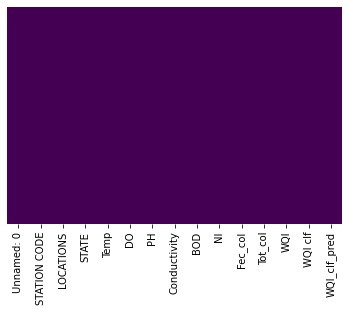

In [13]:
sns.heatmap(df_original.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Creating columns for longitude and latitude in the original dataset.

In [14]:
latitude = [0.0 for x in range(1148)]
df_original["latitude"] = latitude
longitude = [0.0 for x in range(1148)]
df_original["longitude"] = longitude

df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf,WQI_clf_pred,latitude,longitude
0,0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,6.2,8.6,7.7,110.0,0.3,0.7,10.0,641.0,44.135571,1,1,0.0,0.0
1,1,1002,BEAS AT D/S KULU,HIMACHAL PRADESH,11.1,9.2,7.4,107.0,1.0,0.7,495.0,1200.0,53.078269,2,2,0.0,0.0
2,2,1003,BEAS AT D/S AUT,HIMACHAL PRADESH,9.2,9.8,7.7,123.0,0.5,0.7,60.0,897.0,41.297107,1,1,0.0,0.0
3,3,1004,BEAS AT U/SPANDON DAM,HIMACHAL PRADESH,10.0,9.5,7.7,161.0,0.3,0.7,13.0,141.0,39.773308,1,1,0.0,0.0
4,4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,HIMACHAL PRADESH,13.3,10.5,7.9,172.0,0.3,0.7,101.0,778.0,40.521799,1,1,0.0,0.0


In [15]:
df_original = df_original.drop(["Unnamed: 0","LOCATIONS","STATE","Temp","DO","PH","Conductivity","WQI","BOD","NI","Fec_col","Tot_col"], axis = 1)

In [16]:
df_original.dtypes

STATION CODE      int64
WQI clf           int64
WQI_clf_pred      int64
latitude        float64
longitude       float64
dtype: object

Rename the columns

In [17]:
# Changing column names
df_original = df_original.rename(columns={"STATION CODE":"S.Code"})

In [18]:
df_original.dtypes

S.Code            int64
WQI clf           int64
WQI_clf_pred      int64
latitude        float64
longitude       float64
dtype: object

In [19]:
print(df_original.loc[(df_original['longitude'] == 0) & (df_original['S.Code'] == 1533.0)])

     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
835    1533        1             1       0.0        0.0


Remove the duplicates from the dataframe. We will keep just one instance from the instances that have the same station code to simplify the  process.

In [20]:
df_original = df_original.drop_duplicates("S.Code")

Group by the station code becuase there are multiple instances that have the same station code but different measurements.

In [21]:
station_code_groups = df_original.groupby('S.Code')

In [22]:
for name, group in station_code_groups:
    print(name)
    print(group)
    print("\n")

1
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
246       1        3             3       0.0        0.0


2
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
247       2        3             3       0.0        0.0


3
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
996       3        2             2       0.0        0.0


4
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
235       4        2             2       0.0        0.0


5
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
236       5        3             3       0.0        0.0


7
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
266       7        2             2       0.0        0.0


9
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
275       9        1             1       0.0        0.0


10
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
277      10        2             2       0.0        0.0


11
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
413      11 

336    1039        3             3       0.0        0.0


1040
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
337    1040        2             2       0.0        0.0


1041
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
338    1041        3             3       0.0        0.0


1042
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
340    1042        3             3       0.0        0.0


1043
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
341    1043        3             3       0.0        0.0


1044
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
342    1044        3             3       0.0        0.0


1045
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
343    1045        3             3       0.0        0.0


1046
    S.Code  WQI clf  WQI_clf_pred  latitude  longitude
65    1046        3             3       0.0        0.0


1049
    S.Code  WQI clf  WQI_clf_pred  latitude  longitude
66    1049        3             3       0.0        

     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
368    1211        3             3       0.0        0.0


1212
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
405    1212        3             3       0.0        0.0


1213
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
406    1213        2             2       0.0        0.0


1214
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
407    1214        2             2       0.0        0.0


1215
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
401    1215        3             3       0.0        0.0


1218
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
391    1218        2             2       0.0        0.0


1219
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
393    1219        2             3       0.0        0.0


1221
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
244    1221        3             3       0.0        0.0


1222
     S.Code  WQI clf  WQI_clf_pred  latitude  lo

     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
760    1374        3             3       0.0        0.0


1376
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
137    1376        3             3       0.0        0.0


1380
    S.Code  WQI clf  WQI_clf_pred  latitude  longitude
31    1380        2             2       0.0        0.0


1381
    S.Code  WQI clf  WQI_clf_pred  latitude  longitude
35    1381        3             3       0.0        0.0


1382
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
781    1382        2             2       0.0        0.0


1383
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
722    1383        3             3       0.0        0.0


1384
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
592    1384        1             1       0.0        0.0


1385
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
723    1385        1             1       0.0        0.0


1386
     S.Code  WQI clf  WQI_clf_pred  latitude  longit

     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
101    1499        3             3       0.0        0.0


1510
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
138    1510        3             3       0.0        0.0


1513
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
824    1513        2             2       0.0        0.0


1514
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
825    1514        2             2       0.0        0.0


1515
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
826    1515        2             2       0.0        0.0


1516
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
827    1516        2             2       0.0        0.0


1517
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
828    1517        2             2       0.0        0.0


1518
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
829    1518        2             2       0.0        0.0


1519
     S.Code  WQI clf  WQI_clf_pred  latitude  lo

    S.Code  WQI clf  WQI_clf_pred  latitude  longitude
16    1696        2             2       0.0        0.0


1697
    S.Code  WQI clf  WQI_clf_pred  latitude  longitude
18    1697        2             2       0.0        0.0


1698
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
656    1698        3             3       0.0        0.0


1699
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
657    1699        3             3       0.0        0.0


1700
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
658    1700        3             3       0.0        0.0


1701
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
659    1701        3             3       0.0        0.0


1702
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
660    1702        3             3       0.0        0.0


1703
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
661    1703        3             3       0.0        0.0


1704
     S.Code  WQI clf  WQI_clf_pred  latitude  longit

180    1800        2             2       0.0        0.0


1801
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
206    1801        1             1       0.0        0.0


1802
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
211    1802        1             1       0.0        0.0


1803
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
212    1803        1             1       0.0        0.0


1804
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
213    1804        1             1       0.0        0.0


1805
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
214    1805        1             1       0.0        0.0


1806
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
215    1806        1             1       0.0        0.0


1807
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
207    1807        1             1       0.0        0.0


1808
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
208    1808        1             1       0.0    

     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
415    1909        3             3       0.0        0.0


1910
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
408    1910        3             3       0.0        0.0


1911
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
488    1911        3             3       0.0        0.0


1912
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
489    1912        3             3       0.0        0.0


1913
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
418    1913        3             3       0.0        0.0


1920
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
869    1920        2             2       0.0        0.0


1921
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
870    1921        1             1       0.0        0.0


1922
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
871    1922        1             1       0.0        0.0


1924
     S.Code  WQI clf  WQI_clf_pred  latitude  lo

754    2079        3             3       0.0        0.0


2080
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
685    2080        3             3       0.0        0.0


2083
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1013    2083        2             2       0.0        0.0


2084
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1014    2084        3             3       0.0        0.0


2085
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1015    2085        2             2       0.0        0.0


2087
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1016    2087        2             2       0.0        0.0


2088
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1017    2088        2             2       0.0        0.0


2090
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1018    2090        2             2       0.0        0.0


2091
      S.Code  WQI clf  WQI_clf_pred  latitude  longitude
1019    2091        2             2

     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
800    2222        3             3       0.0        0.0


2223
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
801    2223        3             3       0.0        0.0


2224
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
802    2224        3             3       0.0        0.0


2225
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
803    2225        2             2       0.0        0.0


2226
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
804    2226        3             3       0.0        0.0


2227
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
805    2227        2             2       0.0        0.0


2228
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
806    2228        2             2       0.0        0.0


2229
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
216    2229        2             2       0.0        0.0


2230
     S.Code  WQI clf  WQI_clf_pred  latitude  lo

377    2360        3             3       0.0        0.0


2361
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
378    2361        2             2       0.0        0.0


2362
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
379    2362        2             2       0.0        0.0


2363
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
380    2363        3             3       0.0        0.0


2364
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
381    2364        2             2       0.0        0.0


2365
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
383    2365        2             2       0.0        0.0


2366
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
384    2366        2             2       0.0        0.0


2367
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
386    2367        2             2       0.0        0.0


2368
     S.Code  WQI clf  WQI_clf_pred  latitude  longitude
387    2368        3             3       0.0    

Copying the longitude and latitude from the dataset that contains data values into the original dataset.

In [23]:
df_original["S.Code"] = df_original["S.Code"].astype(int)
df_original.dtypes

S.Code            int64
WQI clf           int64
WQI_clf_pred      int64
latitude        float64
longitude       float64
dtype: object

In [24]:
df_new.dtypes

Water Quality\nStation Code                 int64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                  float64
Longitude                                 float64
dtype: object

In [25]:
#Create a dictionary with all station codes, latitude and longitude
my_dict= {x:(y,z)for x,y,z in df_new[['Water Quality\nStation Code','Latitude','Longitude']].itertuples(index = False, name= None)}

In [26]:
my_dict

{14: (17.247331, 81.646613),
 25: (16.492476, 80.640839),
 26: (16.508853, 80.641519),
 30: (14.464393, 78.964627),
 1174: (15.8483, 78.034942),
 1175: (16.001874, 78.364986),
 1177: (16.670823, 80.297751),
 1178: (16.951698, 80.048401),
 1218: (17.069466, 81.711134),
 1219: (17.007975, 81.763328),
 1255: (14.150574, 77.822711),
 1256: (14.572795, 78.79715),
 1257: (14.481442, 79.290142),
 1448: (18.787433, 83.494512),
 1513: (16.501486, 80.675692),
 1514: (16.501508, 80.676725),
 1516: (14.445036, 79.987869),
 1517: (15.8363, 78.048593),
 1518: (15.479222, 78.480942),
 1519: (13.321417, 79.585592),
 1520: (13.758251, 79.701872),
 1521: (17.704261, 83.211783),
 1522: (18.104532, 83.397197),
 1523: (17.015144, 81.736181),
 1524: (16.971003, 82.219006),
 1782: (16.000123, 81.079082),
 1785: (15.944453, 77.419709),
 1786: (16.801875, 80.129553),
 1787: (16.582608, 80.343451),
 1790: (13.710482, 80.084494),
 2350: (15.819061, 78.056866),
 2351: (15.49, 78.4748),
 2352: (18.343003, 84.12432

In [27]:
#assign all the values with same station code to the original dataset
for k, v in my_dict.items():
    df_original["latitude"].loc[df_original["S.Code"] == k] = v[0] 
    df_original["longitude"].loc[df_original["S.Code"] == k] = v[1]

/usr/local/home/namdd/Documents/github (backed up)/environments/water_q_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
df_original.head(20)

,S.Code,WQI clf,WQI_clf_pred,latitude,longitude
0,1001,1,1,32.237794,77.190564
1,1002,2,2,31.963639,77.116392
2,1003,1,1,31.740194,77.207533
3,1004,1,1,31.669367,77.064236
4,1005,1,1,31.422647,76.812947
5,1550,1,1,31.705853,76.934903
6,1006,3,3,31.712408,76.933089
7,1007,1,1,31.838650,76.505144
8,1008,1,1,31.878094,76.203311
9,1009,2,2,31.935022,76.053444


In [29]:
df_original.to_csv("dataset_2_SVM_coordinates.csv", index = False)